# Capstone Mini-Project: Data Wrangling
- Exploratory Data Analysis of Airbnb Dataset
<br>

# Table of Contents
1. [Introduction and Project Goals](#Intro)
2. [Data Management](#Dm) <br>
    2.1 [Drop Features](#Dropfeatures)<br>
    2.2 [Re-code the Features](#Recoding)<br>
    2.3 [Deal with Missingness](#Missing)<br>
    2.4 [Outliers Detection](#Od)<br>
    2.5 [Define Yearly Revenue](#Yd)<br>
3. [Summary](#sum)

# 1. Introduction and Project Goals 
<a id="Intro"> </a>
>- Background
<br>
Airbnb is a popular home-sharing platform enabling home-owners ('hosts') all over the world to share their accommodation ('listings') with the guests, guests can book through Airbnb and stay in them. For potential hosts, this could be a profitable option to list their empty vacation homes or spare rooms. And home-owners even turn their properties into Airbnb hosting exclusively to earn money. 
<br>
As far as we all know, whether an Airbnb listing can attract the customer and gain profits is determined by many factors, it's price, the seasonality, the attribute of the house, and the local marketing, etc.. and if taking the variance of many perspectives, it's even harder to know whether the listing can make profits both in the short-term and the long-term. 
<br/><br/>
>- Goals
<br>
This project aim to take advantage of the Airbnb Seattle dataset, to leverage the insights of the Seattle Airbnb marketing as well as answer the key question - for hosts, how to maximize their earning? More specifically, 'Yield' will be defined during the data analysis as the key metric representing earnings, also will be our prediction of interest. And the whole project consisted of data wrangling and modeling two parts.
<br/><br/>
>- Motivations
<br>
Answering the question would be a benefit for both potential hosts and any home-sharing platform, that info will be very useful guidance to make the investment as well as regulate the listings market.
<br/><br/>
>- Data Source: https://www.kaggle.com/airbnb/seattle#listings.csv
<br>
>- Reference: http://insideairbnb.com/about.html
>- The dataset comprises of three main tables, listings, reviews, calendar. And we will focus on the listings dataset for analysis, which contains all the necessary information.

In [76]:
# Import packages
import pandas as pd
import numpy as np
import pandas_profiling as pf 
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns   
import missingno as msno
from collections import Counter

# 2. Data Management
<a id="Dm"> </a>

In [77]:
# Load the data
listings = pd.read_csv("listings.csv") 

#Overview the dataset
print('Listings Dataset Overview')
print(listings.info(verbose = True))

#preview the dataset
print('Listings Dataset Preview')
listings.head(5)


Listings Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7544 entries, 0 to 7543
Data columns (total 106 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   id                                            int64  
 1   listing_url                                   object 
 2   scrape_id                                     int64  
 3   last_scraped                                  object 
 4   name                                          object 
 5   summary                                       object 
 6   space                                         object 
 7   description                                   object 
 8   experiences_offered                           object 
 9   neighborhood_overview                         object 
 10  notes                                         object 
 11  transit                                       object 
 12  access                             

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20200222045957,2020-02-22,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, Dutch Colonial ...","This beautiful, gracious home has been complet...","Gorgeous, architect remodeled, Dutch Colonial ...",none,Madrona is a hidden gem of a neighborhood. It ...,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.23000
1,6606,https://www.airbnb.com/rooms/6606,20200222045957,2020-02-22,"Fab, private seattle urban cottage!","This tiny cottage is only 15x10, but it has ev...","Soo centrally located, this is a little house ...","This tiny cottage is only 15x10, but it has ev...",none,"A peaceful yet highly accessible neighborhood,...",...,f,f,strict_14_with_grace_period,f,f,3,3,0,0,1.16000
2,9419,https://www.airbnb.com/rooms/9419,20200222045957,2020-02-22,Glorious sun room w/ memory foambed,This beautiful double room features a magical ...,Our new Sunny space has a private room from th...,This beautiful double room features a magical ...,none,"Lots of restaurants (see our guide book) bars,...",...,f,f,moderate,t,t,7,0,7,0,1.27000
3,9460,https://www.airbnb.com/rooms/9460,20200222045957,2020-02-22,Downtown Convention Center B&B -- Free Minibar,Take up a glass of wine and unwind on one of t...,Greetings from Seattle. Thanks for considering...,Take up a glass of wine and unwind on one of t...,none,This is where Downtown meets First Hill and hi...,...,t,f,moderate,f,f,4,3,1,0,3.63000
4,9531,https://www.airbnb.com/rooms/9531,20200222045957,2020-02-22,The Adorable Sweet Orange Craftsman,The Sweet Orange is a delightful and spacious ...,"The Sweet Orange invites you to stay and play,...",The Sweet Orange is a delightful and spacious ...,none,The neighborhood is awesome! Just far enough ...,...,f,f,strict_14_with_grace_period,f,t,2,2,0,0,0.40000


## 2.1 Drop Features
<a id="Dropfeatures"></a>

>In this section, we will drop features with no useful information and redundancy features, which are,<br/><br/>
__1. Meaningless Features:__ 
    - ID, URL, name， constant values, text-related values 
__2. Redundancy Features:__
    - Multiple Features are describing the same perspective information
__3. Over-Missingness Features:__
    - Features contains excess missing values

__Drop Meaningless Features__
<br>

These type of features will be dropped in the following chunk,
 - ID
 - URL 
 - Name 
 - Constant values 
 - Text-related values

In [78]:
# Pre-define the functions to use
# Define the summary function for missing counts and percentages
def summarize_missing(df):
    # Null counts
    NAs = df.isnull().sum().rename('No. Missing')
    pcts = NAs/len(df.index)
    pcts = pcts.rename('Perct. Missing').map('{:,.2%}'.format)
    return  pd.concat([NAs, pcts], axis=1, sort=False)

# Define a drop function for repeatitive use
def drop(data, feat):
    """
    drop feature from data
    """
    new_data = data.drop(feat, axis=1)
    print('Dropping {}...'.format(feat))
    return new_data


#########################################
# Drop meaningless value
# Drop ID, URL and Name
ID_list = ['id', 'scrape_id', 'host_verifications']

listings_clean = listings.copy()
for feat in listings.columns:
    if feat in ID_list:
        listings_clean = drop(listings_clean, feat)
    if 'url' in feat:
        listings_clean = drop(listings_clean, feat)
    if 'name' in feat:
        listings_clean = drop(listings_clean, feat)
        
        
# Drop text-related values
text_list = ['summary', 'space', 'description', 'neighborhood_overview', 
             'notes', 'transit', 'access', 'interaction', 
             'house_rules', 'host_about', 'license']

for feat in listings.columns:
    if feat in text_list:
        listings_clean = drop(listings_clean, feat)
        
        
# Drop the constant values
for feat in listings_clean.columns:
    if len(listings_clean[feat].value_counts()) <= 1:
        listings_clean = drop(listings_clean, feat)

        
# Drop the features with missingness over 50% if there's any.
for feat in listings_clean.columns:
    if listings_clean[feat].isnull().sum()/len(listings_clean.index) > 0.5:
        listings_clean = drop(listings_clean, feat)

Dropping id...
Dropping listing_url...
Dropping scrape_id...
Dropping name...
Dropping thumbnail_url...
Dropping medium_url...
Dropping picture_url...
Dropping xl_picture_url...
Dropping host_url...
Dropping host_name...
Dropping host_thumbnail_url...
Dropping host_picture_url...
Dropping host_verifications...
Dropping jurisdiction_names...
Dropping summary...
Dropping space...
Dropping description...
Dropping neighborhood_overview...
Dropping notes...
Dropping transit...
Dropping access...
Dropping interaction...
Dropping house_rules...
Dropping host_about...
Dropping license...
Dropping last_scraped...
Dropping experiences_offered...
Dropping country_code...
Dropping country...
Dropping has_availability...
Dropping calendar_last_scraped...
Dropping is_business_travel_ready...
Dropping square_feet...
Dropping weekly_price...
Dropping monthly_price...


__Drop Redundancy Features__<br>

These redundancy features below will be processed in the next couples of steps,
 - 1. Location Features
 - 2. Neighbourhood Features
 - 3. Listing count Features
 - 4. Availability Features
 - 5. Maximum/Minimum Night Features

__1. Location Features__ 
   - `host_location`
   - `city`
   - `state`
   - `market`
   - `smart_location`
<br>These features are describing the information of Seattle, all of they'll be dropped.
<br>Noted that the `host_location` indicates the host original location, it not the info of interests.

In [79]:
# Redundancy features of location

# Print the level of each silimiar features
state_list = ['host_location', 'city','state','market', 'smart_location']

for feat in listings_clean.columns:
    if feat in state_list:
        print('Level of ' + feat + ' :', len(listings_clean[feat].value_counts()))
        print()
        print(listings_clean[feat].value_counts() , '\n')
        
# Drop the redundancy Features
# These location features above are describing the only info of state 'Seattle'
# drop all of them.
# Drop feature
for feat in listings.columns:
    if feat in state_list:
        listings_clean = drop(listings_clean, feat)
        

Level of host_location : 204

Seattle, Washington, United States                5837
US                                                 614
San Francisco, California, United States           276
CA                                                  66
Spokane, Washington, United States                  60
                                                  ... 
Nelson, British Columbia, Canada                     1
Hillsboro, Oregon, United States                     1
Piscataway Township, New Jersey, United States       1
4oSeattle, Elephant                                  1
Wilmington, North Carolina, United States            1
Name: host_location, Length: 204, dtype: int64 

Level of city : 11

Seattle                  7524
Shoreline                   6
Seattle                     4
Lake Forest Park            3
Ballard Seattle             1
Tukwila                     1
Ballard, Seattle            1
Redmond                     1
West Seattle                1
                          

__2. Neighbourhood Features__ 
   - `host_neighbourhood` 
   - `street`
   - `neighbourhood` 
   - `neighbourhood_cleansed`
   - `neighbourhood_group_cleansed` 
   - `zipcode`.
   <br> The feature `neighbourhood_group_cleansed` will be kept since it's a cleaned features with 17 categories;
   <br> We will keep the zipcode and geographical data( `latitude`, `longitude`) for visualization of geographical pattern then dropped latter.

In [80]:
# Examine the features of exact location together,
Location_list =['host_neighbourhood','street', 'neighbourhood', 'neighbourhood_cleansed',
                'neighbourhood_group_cleansed', 'zipcode' ]

for feat in listings_clean.columns:
    if feat in Location_list:
        print('Level of ' + feat + ' :', len(listings_clean[feat].value_counts()))
        print()
        print(listings_clean[feat].value_counts(), '\n' )
        
        
# Drop features that are with many categories
# Keep only `neighbourhood_group_cleansed` with level of 17
Location_drop =['host_neighbourhood', 'street', 'neighbourhood', 'neighbourhood_cleansed' ]

for feat in listings_clean.columns:
    if feat in Location_drop:
        listings_clean = drop(listings_clean, feat)


Level of host_neighbourhood : 137

Capitol Hill                 449
Belltown                     406
Pike Place Market            364
Queen Anne                   359
Ballard                      348
                            ... 
Somerville                     1
West Loop/Greektown            1
Broadway                       1
Presidio                       1
Westchester/Playa Del Rey      1
Name: host_neighbourhood, Length: 137, dtype: int64 

Level of street : 14

Seattle, WA, United States                  7522
Shoreline, WA, United States                   6
Lake Forest Park, WA, United States            3
Seattle , WA, United States                    3
Seattle, United States                         1
Seattle, Wa, United States                     1
West Seattle, WA, United States                1
Redmond, WA, United States                     1
Ballard Seattle, WA, United States             1
US, United States                              1
Seattle , Wa, United States         

__3. Listing count Features__
  - `calculated_host_listings_count`
  - `host_listings_count`
  - `host_total_listings_count`
  - `calculated_host_listings_count_shared_room`
  - `calculated_host_listings_entire_home`  
  - `calculated_host_listings_private_rooms`
<br> We check the distribution of all the features above as well as their correlation. And we keep three of them.

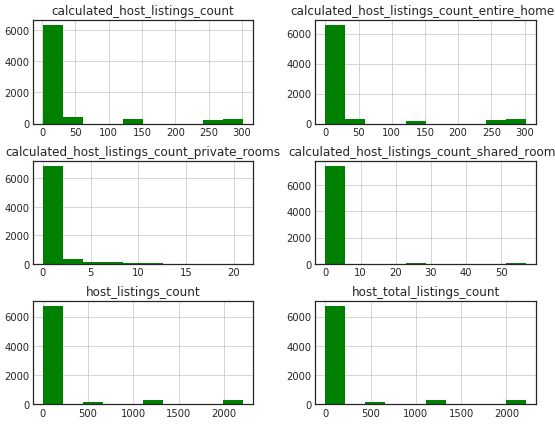

In [81]:
# Get all the host count
host_count = pd.DataFrame()
for feat in listings_clean.columns:
    if 'count' in feat:              
        host_count[feat] = listings_clean[feat]

# Plot all the count related variables
with plt.style.context("seaborn-white"):
    plt.rcParams["figure.figsize"] = [8, 6]
    host_count.hist(bins=10, color = 'green')
    plt.tight_layout()

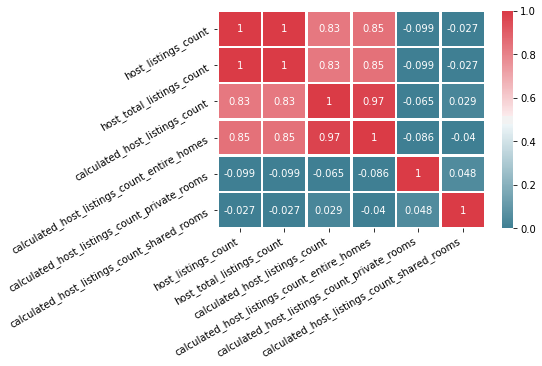

Dropping host_listings_count...
Dropping host_total_listings_count...
Dropping calculated_host_listings_count...


In [82]:
# Plot the correlations
plt.rcParams["figure.figsize"] = [6,4]
corr = host_count.corr()
ax = sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),annot = True, vmin=0, vmax=1, center=0.5, linewidth=1.5)
ax.set_xticklabels( ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_yticklabels( ax.get_yticklabels(), rotation=30, horizontalalignment='right') 
plt.show()

# Drop redundant features
count_drop = ['host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count']

for feat in listings_clean.columns:
    if feat in count_drop:
        listings_clean = drop(listings_clean, feat)

__4. Availability Features__
  -  `availability_30`
  -  `availability_60`  
  -  `availability_90`  
  -  `availability_365`
<br/>
There are multiple different measures of availability, which are highly correlated with each other. 
we will keep `availability_90`. Since we assume that the majority of the staying are short-term, and we believe 90 days info can include as much as we needed.

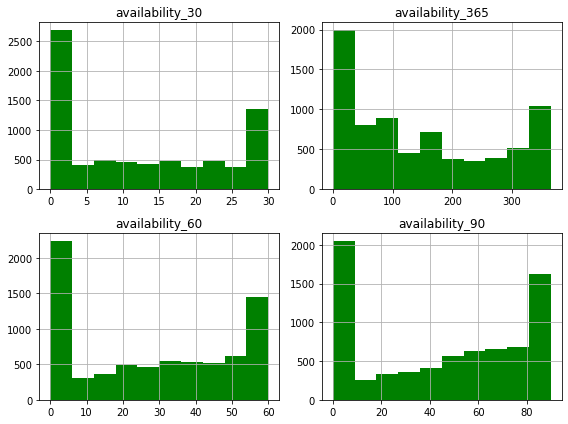

In [83]:
# Get all the availability data
listings_availability = pd.DataFrame()
for feat in listings_clean.columns:
    if 'availability' in feat:              
        listings_availability[feat] = listings_clean[feat]

# Plot all the availability related variables
plt.rcParams["figure.figsize"] = [8, 6]
listings_availability.hist(bins=10, color = 'green')
plt.tight_layout()

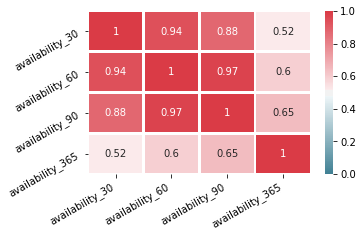

Dropping availability_30...
Dropping availability_60...
Dropping availability_365...


In [84]:
# Plot the correlations
plt.rcParams["figure.figsize"] = [5,3]
corr = listings_availability.corr()
ax = sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
                 annot = True, vmin=0, vmax=1, center=0.5, linewidth=1.5)
ax.set_xticklabels( ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_yticklabels( ax.get_yticklabels(), rotation=30, horizontalalignment='right') 
plt.show()

# Drop feature
availability_drop = ['availability_30', 'availability_60', 'availability_365']
for feat in listings_clean.columns:
    if feat in availability_drop:
        listings_clean = drop(listings_clean, feat)

__5. Maximum/Minimum Night Features__

- `minimum_nights`
- `minimum_nights_avg_ntm`
- `maximum_nights`
- `minimum_minimum_nights`
- `maximum_minimum_nights`
- `minimum_maximum_nights`
- `maximum_maximum_nights`
<br/> The _ntm indicates __[Next Twelve Month(NTM)](https://www.divestopedia.com/definition/769/next-twelve-months-ntm)__, this refers to any financial measure such as revenue, EBITDA, or net income that is being forecasted for the immediate next twelve months from the current date. Since we will come up a new business metrics regarding the revenue, we will keep this feature among all.

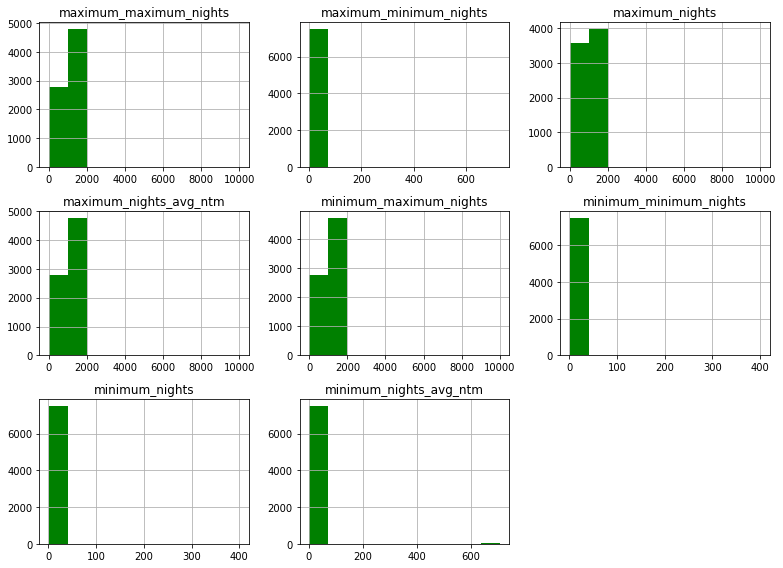

In [85]:
# get all the staying restriction values
host_nights = pd.DataFrame()
for feat in listings_clean.columns:
    if 'nights' in feat:              
        host_nights[feat] = listings_clean[feat]
        
# Plot all the availability related variables
plt.rcParams["figure.figsize"] = [11, 8]
host_nights.hist(bins=10, color = 'green')
plt.tight_layout()

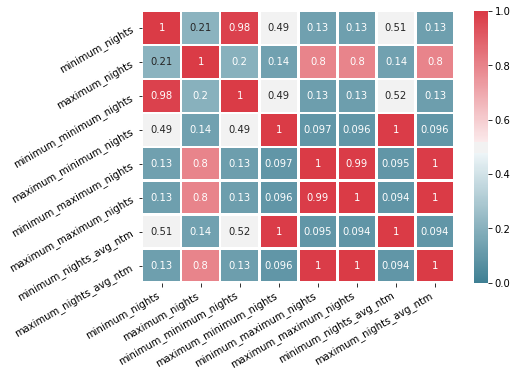

Dropping minimum_nights...
Dropping maximum_nights...
Dropping minimum_minimum_nights...
Dropping maximum_minimum_nights...
Dropping minimum_maximum_nights...
Dropping maximum_maximum_nights...


In [86]:
# Plot the correlations
plt.rcParams["figure.figsize"] = [7,5]
corr = host_nights.corr()
ax = sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
                 annot = True, vmin=0, vmax=1, center=0.5, linewidth=1.5)
ax.set_xticklabels( ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_yticklabels( ax.get_yticklabels(), rotation=30, horizontalalignment='right') 
plt.show()

# Drop features
for feat in listings_clean.columns:
    if feat in host_nights.columns:
        if feat not in ['minimum_nights_avg_ntm', 'maximum_nights_avg_ntm']:
            listings_clean = drop(listings_clean, feat)

## 2.2 Re-code the Features
<a id="Recoding"></a>
> this section serves a purpose to re-code the features for:
- Convert data type
- Recategorize the data 
- Extract the `amenities` information 

__Convert Data Type__

- convert the objects to numeric/categorical/datetime/boolean data type

In [87]:
# For each kind of features, we create list respectively
# Time features
time = ['host_since', 'first_review', 'last_review']

# Categorical feature
categoricals = ['calendar_updated', 'host_response_time', 'neighbourhood_group_cleansed', 
                'property_type', 'room_type', 'bed_type', 'cancellation_policy' ]
# price features
price = ['price', 'security_deposit', 'cleaning_fee', 'extra_people']    

# continuous features
continuous = ['host_response_rate', 'host_acceptance_rate']

# Boolean features
boolean = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 
           'is_location_exact', 'requires_license', 'instant_bookable', 
           'require_guest_profile_picture', 'require_guest_phone_verification']


# Convert the objects into corresponding category
for feat in listings_clean.columns:
    if feat in time:
        listings_clean[feat] = pd.to_datetime(listings_clean[feat], format='%Y/%m/%d')
    if feat in categoricals:
        listings_clean[feat] = listings_clean[feat].astype('category')
    if feat in price:
        listings_clean[feat] = listings_clean[feat].str.lstrip('$,').str.replace(',', '').astype('float')
    if feat in continuous:
        listings_clean[feat] = listings_clean[feat].str.rstrip('%').astype('float')/100        
    if feat in boolean:
        listings_clean[feat] = listings_clean[feat].map(lambda available: 1 if available == 't' else 0).astype('float')

__Recategorize the Data__

1. regroup the features into less categories;
    - `property type`
    - `bed type`
    - `cancellation policy`
    - `calendar updated` 

In [88]:
########
# regroup feature property_type
print('property_type Before Regrouping' +' :', len(listings_clean.property_type.value_counts()))
print()   
print(listings_clean.property_type.value_counts(), '\n' )

# Replacing categories that are types of houses or apartments
listings_clean.property_type.replace({'Townhouse': 'House', 'Condominium': 
                                      'Apartment','Loft': 'Apartment', 
                                      'Bungalow': 'House', 'Chalet': 'House' }, 
                                     inplace=True)

# Replacing other categories with 'other'
listings_clean.loc[~listings_clean.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'
listings_clean['property_type']= listings_clean['property_type'].astype('category')

print('property_type After Regrouping')
print(listings_clean.property_type.value_counts())
print()


########
# regroup feature bed_type
# Show category with percentage
print("bed type %:")
print(listings_clean.bed_type.value_counts(normalize=True))

# Drop the features
listings_clean.drop('bed_type', axis=1, inplace=True)
print()

########
# regroup feature cancellation_policy
# Check cancellation_policy - looks good
print("cancellation policy before regrouping")
print(listings_clean.cancellation_policy.value_counts())

#regroup
listings_clean.cancellation_policy.replace({'strict': 'strict_14_with_grace_period', 
                                            'super_strict_30': 'strict_14_with_grace_period',
                                            'super_strict_60': 'strict_14_with_grace_period'}, 
                                           inplace=True)

print("cancellation policy after regrouping")
print(listings_clean.cancellation_policy.value_counts())
print()


########
#regroup calendar_updated
print("calendar updated before regrouping")
print(listings_clean.calendar_updated.value_counts())

listings_clean.calendar_updated.replace({'today':     'within a week', 
                                        'yesterday':  'within a week',
                                        '2 days ago': 'within a week',
                                        '3 days ago': 'within a week',
                                        '4 days ago': 'within a week',
                                        '5 days ago': 'within a week',
                                        '6 days ago': 'within a week',
                                        '1 week ago': 'within a month',
                                        'a week ago' :'within a month',
                                        '2 weeks ago':'within a month',
                                        '3 weeks ago':'within a month',
                                        '4 weeks ago':'within a month'}, 
                                        inplace=True)


# Replacing other categories with 'other'
listings_clean.loc[~listings_clean.calendar_updated.isin(['within a week', 'within a month']), 'calendar_updated'] = 'over a month'

listings_clean['calendar_updated']= listings_clean['calendar_updated'].astype('category')

# Post check the new regroupped data
print("calendar updated after regrouping")
print(listings_clean.calendar_updated.value_counts())
print()

property_type Before Regrouping : 30

House                 2399
Apartment             2183
Guest suite            882
Townhouse              574
Condominium            459
Serviced apartment     413
Guesthouse             236
Loft                    74
Bungalow                70
Boutique hotel          61
Cottage                 55
Tiny house              16
Boat                    15
Bed and breakfast       14
Other                   13
Houseboat               12
Cabin                   12
Camper/RV               11
Villa                    9
Aparthotel               7
Dome house               7
Hotel                    7
Hostel                   3
Tent                     3
Earth house              2
Resort                   2
Yurt                     2
Chalet                   1
In-law                   1
Treehouse                1
Name: property_type, dtype: int64 

property_type After Regrouping
House        3044
Apartment    2716
Other        1784
Name: property_type, dtype: int

2. regroup the features into less categories;
    - we need to dive into the data first to check some pattern then decide how to regroup the following features,
      - `time_to_first_review`
      - `last_review_month`
      - `review_scores_accuracy`
      - `host_response_rate/time`

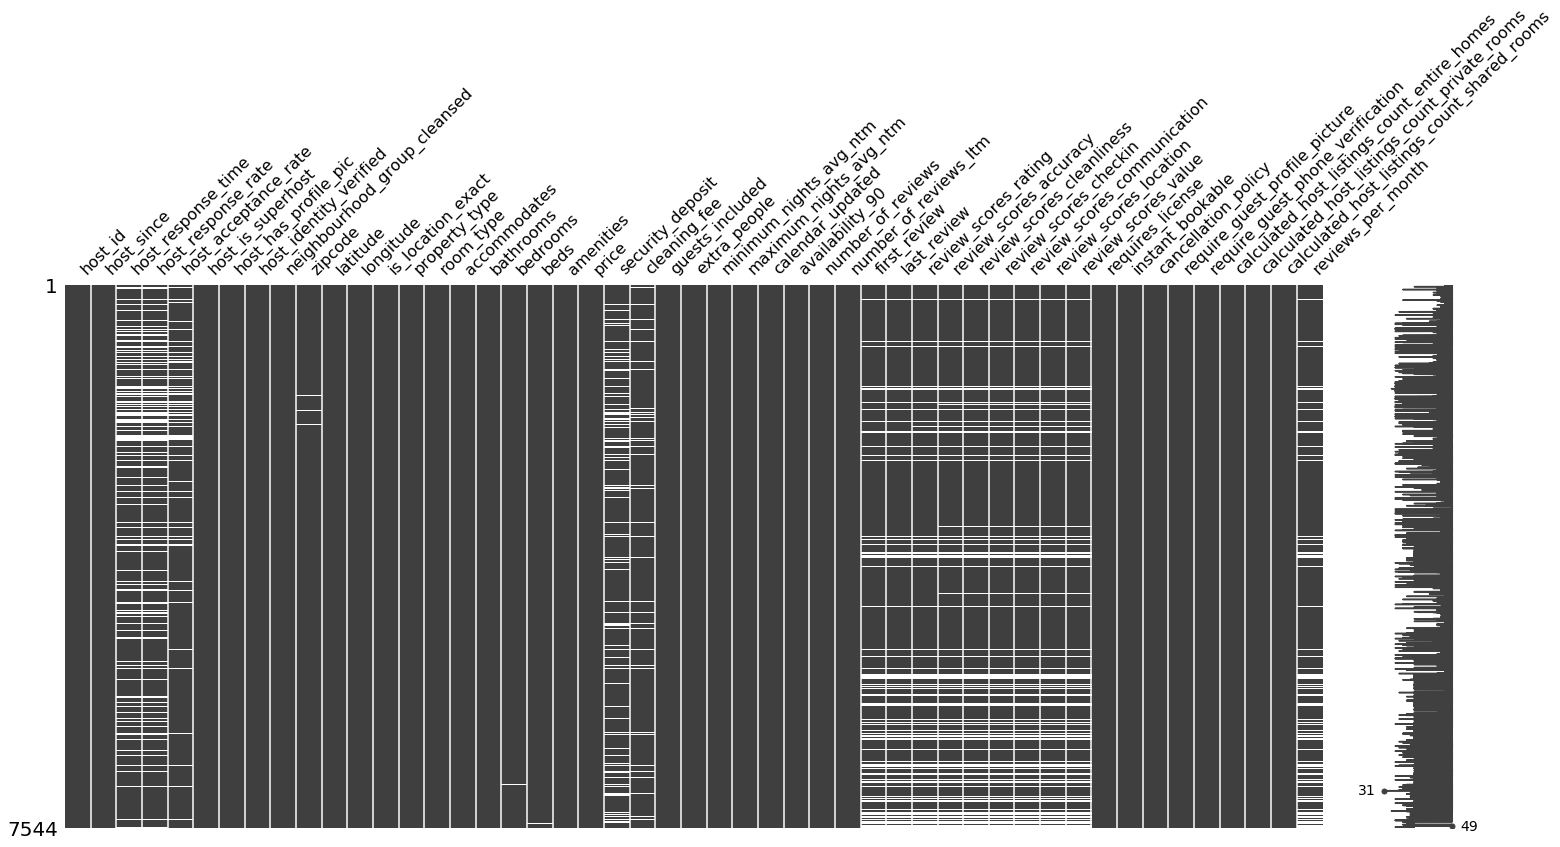

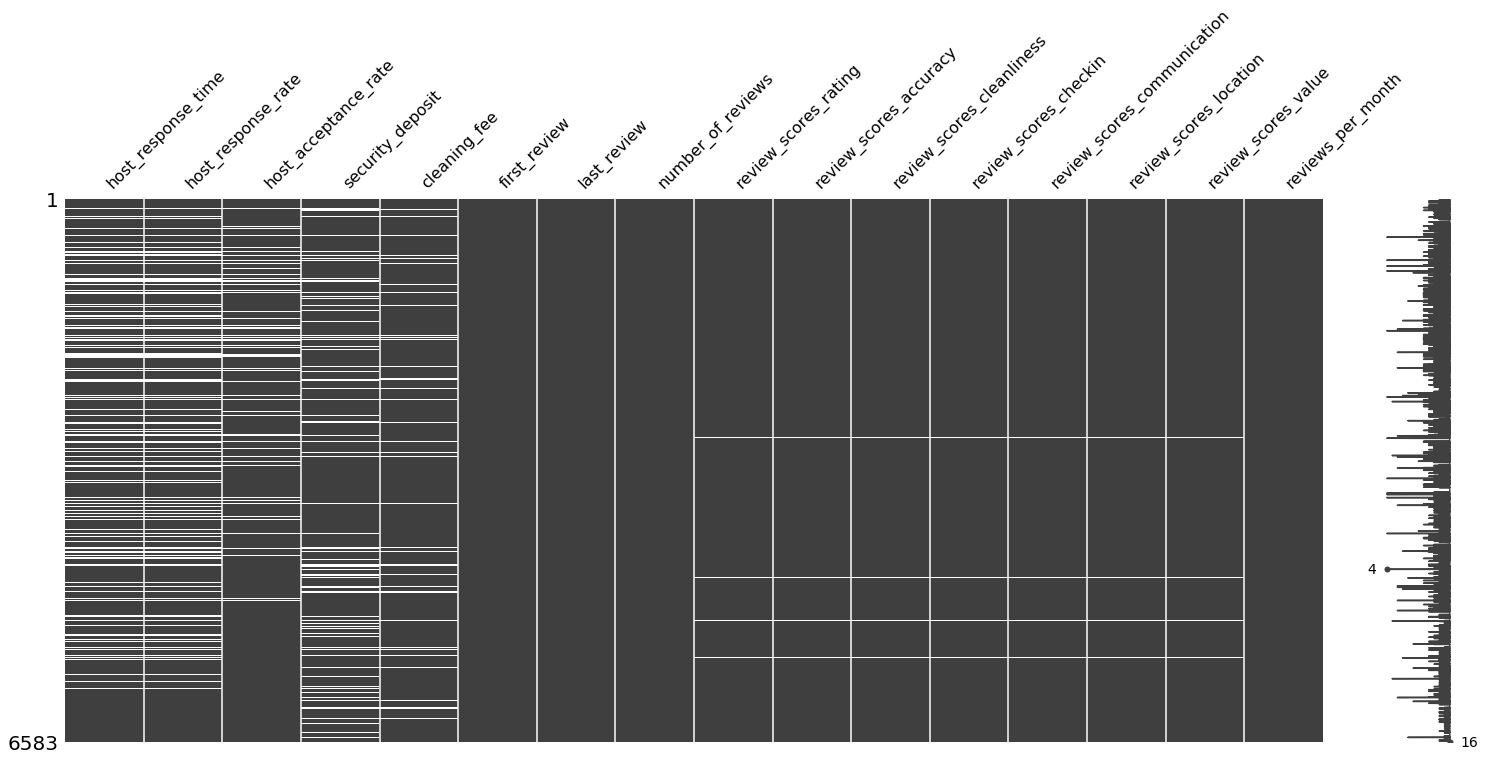

,host_response_time,host_response_rate,host_acceptance_rate,security_deposit,cleaning_fee,first_review,last_review,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
9,within a few hours,1.00000,0.82000,nan,nan,2010-08-09,2020-01-31,150,92.00000,9.00000,9.00000,10.00000,9.00000,10.00000,9.00000,1.29000
22,within a few hours,1.00000,nan,350.00000,nan,2010-08-26,2017-05-06,28,96.00000,10.00000,10.00000,10.00000,10.00000,9.00000,9.00000,0.24000
26,within a few hours,1.00000,0.58000,nan,nan,2011-03-09,2020-02-17,190,96.00000,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000,1.74000
28,NaN,nan,nan,nan,50.00000,2011-04-30,2016-09-24,15,87.00000,9.00000,8.00000,9.00000,9.00000,10.00000,9.00000,0.14000
30,within a day,1.00000,0.70000,nan,nan,2011-05-09,2019-09-07,72,94.00000,10.00000,9.00000,10.00000,10.00000,10.00000,9.00000,0.67000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7065,within a few hours,1.00000,0.92000,nan,nan,2019-11-24,2020-02-16,4,87.00000,10.00000,7.00000,10.00000,9.00000,9.00000,10.00000,1.32000
7211,within an hour,1.00000,1.00000,nan,nan,2019-12-23,2019-12-26,2,100.00000,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000,0.97000
7320,within an hour,1.00000,1.00000,nan,50.00000,2020-01-31,2020-01-31,1,nan,nan,nan,nan,nan,nan,nan,1.00000
7386,within an hour,1.00000,1.00000,nan,nan,2020-02-03,2020-02-17,3,100.00000,10.00000,10.00000,10.00000,10.00000,10.00000,9.00000,3.00000


In [89]:
# Missing pattern visualization
msno.matrix(listings_clean)
plt.show()

# Drop the rows first/last review is missing
listings_clean.dropna(subset=['first_review', 'first_review'], how='all', inplace = True)

# Get the missing columns for exact pattern cheeck 
cols_to_check = ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'security_deposit', 
                 'cleaning_fee', 'first_review', 'last_review','number_of_reviews', 'review_scores_rating', 
                 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                 'review_scores_communication', 'review_scores_location', 'review_scores_value', 
                 'reviews_per_month']

data_check = listings_clean.loc[:,cols_to_check]

# Re-visit the plot
msno.matrix(listings_clean.loc[:,cols_to_check])
plt.show()

# show the data
data_check.loc[data_check.isnull().sum(1)>1]

It's very obvious that 
 - `host_since`
 - `host_response_rate` 
 - `host_acceptance_rate`<br> 
 
have the highly similar missing pattern, and also for all review features: 
 - `first_review`
 - `last_review`, 
 - all the `review_scores_...` 
 - `reviews_per_month`<br>
 
their missingness are all with the same observations. Further, these NA observation all have `numbers of review` as 0, which might be a very useful info to keep that these listings attract to no potential customers at all if we consider using the review numbers as the booking reference.


This features should be treated carefully, we don't want to drop them or imputed as mode or median because these records could be indicating the inactive listings - these listings are legitimate properties and either have their calendars closed or have an unacceptably high price in their areas. The reason we want to keep those listing is that they are legitimate properties with advertised prices. When considering the revenue of a listing, they should be considered since other related information of those listed may reveal why these properties are not favorable among the customers, therefore they have low yields.


Hence in the data management step down below, we will encode the related missing values as __no review__/__unknown__, to including these info into our data.





> `time_to_first_review`/`last_review_month`<br>
- Those two calculate features are two metrics indicating,
  - the length of the listing start on the platform to the first review, we believe it's a measurement of the attraction of the listing, the faster they can let the customer leave a review, the better potential attraction it indicates.
  - the length from the time point of the last review to the data was scraped, which can indicate the sustainability of the listing - the closer that last time they were active indicates they have better sustainability, they can keep the customer staying.

In [90]:
# Define the regroup function
def regroup(df, col, bins, labels, na_label = 'nan'):
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].replace('nan', 'no reviews', inplace=True)

# Set the first review time equal to the host time if the review time is earlier
listings_clean.loc[listings_clean['host_since'] > listings_clean['first_review'], 'first_review'] = listings_clean['host_since']
    
# Calculate time interval
# Time takes to get the first review
listings_clean['time_to_first_review'] = (listings_clean.first_review - listings_clean.host_since).astype('timedelta64[D]') 
# Time since last active
listings_clean['last_review_month'] = (datetime(2020, 2, 22) - listings_clean.last_review).astype('timedelta64[D]')
 
# regroup the calculated time interval
# regroup the time to active first review
regroup(listings_clean,
        'time_to_first_review',
        bins=[0, 182, 365, 730, 1460, max(listings_clean.time_to_first_review)],
        labels=['0-6 months', '6-12 months', '1-2 years', '2-3 years','4+ years']  )

# regroup time since last review
regroup(listings_clean,
        'last_review_month',
        bins=[0, 14, 60, 182, 365, max(listings_clean.last_review_month)],
        labels=['0-2 weeks', '2-8 weeks', '2-6 months', '6-12 months', '1+ year'] )

listings_clean['time_to_first_review']= listings_clean['time_to_first_review'].astype('category')
listings_clean['last_review_month']= listings_clean['last_review_month'].astype('category')

# Post heck the results  
print('Active time since host for listings %:')
print(listings_clean['time_to_first_review'].value_counts(normalize=True))
print()

print('Time since last reviews %:')
print(listings_clean['last_review_month'].value_counts(normalize=True))

    

Active time since host for listings %:
2-3 years     0.26477
4+ years      0.24700
0-6 months    0.24351
1-2 years     0.14902
6-12 months   0.09570
Name: time_to_first_review, dtype: float64

Time since last reviews %:
2-8 weeks     0.30184
0-2 weeks     0.25141
2-6 months    0.22224
1+ year       0.15160
6-12 months   0.07292
Name: last_review_month, dtype: float64


> `review_scores_...`<br>
There is a group of features describing the review rating from a different perspective. we will regroup them into a new category, and keep the missing value as 'unknown'.

In [91]:
# Check all the review related features 

# Creat a sub dataset for review rating
listings_review_rating = pd.DataFrame()
for feat in listings_clean.columns:
    if 'review_scores' in feat:              
        listings_review_rating[feat] = listings_clean[feat]
        
# Check the distribution of all the review features
# Plot the distribution
#plt.rcParams["figure.figsize"] = [10,8]
#listings_review_rating.hist(bins=10, color = 'green')
#plt.tight_layout()
    
# get a list for all review related features
review_score = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                'review_scores_communication', 'review_scores_location', 'review_scores_value']

# regroup columns scored out of 10
for col in review_score:
    regroup(listings_clean,
            col,
            bins=[0, 8, 9, 10],
            labels=['0-8/10', '9/10', '10/10'],
            na_label='no reviews')

# regroup column scored out of 100
regroup(listings_clean,
        'review_scores_rating',
        bins=[0, 80, 95, 100],
        labels=['0-79/100', '80-94/100', '95-100/100'],
        na_label='no reviews')

# Convert to rigth category
for feat in listings_clean.columns:
    if feat in review_score:
        listings_clean[feat] = listings_clean[feat].astype('category')
        
listings_clean['review_scores_rating'] = listings_clean['review_scores_rating'].astype('category')

# Check one features
for feat in listings_review_rating.columns:
    print(feat + ' after Recatogerizing')
    print(listings_clean[feat].value_counts(normalize=True), "\n")

review_scores_rating after Recatogerizing
95-100/100   0.66657
80-94/100    0.28209
0-79/100     0.04496
no reviews   0.00638
Name: review_scores_rating, dtype: float64 

review_scores_accuracy after Recatogerizing
10/10        0.80738
9/10         0.14568
0-8/10       0.03934
no reviews   0.00760
Name: review_scores_accuracy, dtype: float64 

review_scores_cleanliness after Recatogerizing
10/10        0.73583
9/10         0.20204
0-8/10       0.05453
no reviews   0.00760
Name: review_scores_cleanliness, dtype: float64 

review_scores_checkin after Recatogerizing
10/10        0.87134
9/10         0.09236
0-8/10       0.02886
no reviews   0.00744
Name: review_scores_checkin, dtype: float64 

review_scores_communication after Recatogerizing
10/10        0.87042
9/10         0.09449
0-8/10       0.02780
no reviews   0.00729
Name: review_scores_communication, dtype: float64 

review_scores_location after Recatogerizing
10/10        0.84566
9/10         0.12775
0-8/10       0.01914
no revie

>`host_response_rate/time`<br>
Keep the missing value as unknown.

In [92]:
# Host response rate
# regroup into four groups
listings_clean.host_response_rate = pd.cut(listings_clean.host_response_rate, 
                                           bins=[0, 0.5, 0.9, 0.99, 1], 
                                           labels=['0-49%', '50-89%', '90-99%', '100%'], 
                                           include_lowest=True)

# Converting to string
listings_clean.host_response_rate = listings_clean.host_response_rate.astype('str')

# Replace nulls with 'unknown'
listings_clean.host_response_rate.replace('nan', 'unknown', inplace=True)
listings_clean['host_response_rate']= listings_clean['host_response_rate'].astype('category')

# counts summary
print('host_response_rate after recategorizing')
print(listings_clean.host_response_rate.value_counts(normalize=True))



##########
# Host response time
listings_clean.host_response_time = listings_clean.host_response_time.cat.add_categories('unknown')
listings_clean.host_response_time.fillna("unknown", inplace=True)

# Regroup feature host_response_time
print('Level Before Regrouping' +' :', len(listings_clean.host_response_time.value_counts()))
print()   
print(listings_clean.host_response_time.value_counts(), '\n' )
listings_clean.host_response_time.replace({'within a few hours': 'over an hour',
                                           'within a day': 'over an hour', 
                                           'a few days or more': 'over an hour'}, 
                                          inplace=True)
print('host_response_time After Regrouping')
print(listings_clean.host_response_time.value_counts())
print()


##########
# Review per month
# Replace nulls with 0
listings_clean.reviews_per_month.fillna(0, inplace=True)

# Run simple stats
listings_clean.reviews_per_month.describe()

# drop feature
#listings_clean.drop('number_of_reviews', axis=1, inplace=True)


host_response_rate after recategorizing
100%      0.62935
unknown   0.19064
90-99%    0.12942
50-89%    0.04253
0-49%     0.00805
Name: host_response_rate, dtype: float64
Level Before Regrouping : 5

within an hour        4538
unknown               1255
within a few hours     505
within a day           237
a few days or more      48
Name: host_response_time, dtype: int64 

host_response_time After Regrouping
within an hour    4538
unknown           1255
over an hour       790
Name: host_response_time, dtype: int64



count   6583.00000
mean       2.22845
std        2.11677
min        0.01000
25%        0.49000
50%        1.58000
75%        3.40000
max       15.00000
Name: reviews_per_month, dtype: float64

`amenities`

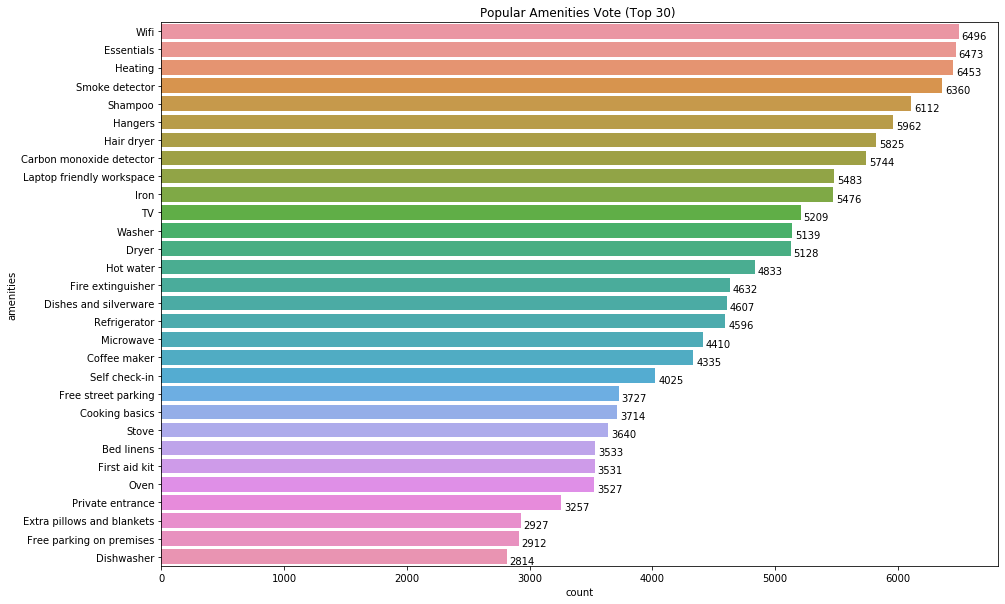

[]


In [93]:
# Review original amenities
listings_clean['amenities'].head()

# Extract the element from the amenities
amenities_list = list(listings_clean.amenities)
amenities_list_string = "".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')

# Create a list to included all the amenities has showed up in entry 
amenities_set = [x.strip() for x in amenities_list_string.split(',')]

#Create a dictionary for all the amenities with their counts
counter_amenities = Counter(amenities_set)
amenities_df = pd.DataFrame.from_dict(counter_amenities, orient='index').reset_index()

# Get top 30 amenities
amenities_df.columns = ['amenities', 'count']
amenities_df = amenities_df.sort_values(by='count', ascending=False)
amenities_df = amenities_df.drop(2)
amenities_df_top_30 = amenities_df.nlargest(30, 'count')
#amenities_df_top_30

# Visualize the Amenities by counts
plt.rcParams["figure.figsize"] = [15,10]
## Create plot
splot = sns.barplot(x="count", y="amenities", data=amenities_df_top_30)
## Adding text
for p in splot.patches:
    width = p.get_width()
    splot.text(width + 127  ,
            p.get_y()+p.get_height()/2. + 0.4,
            '{:1.0f}'.format(width),
            ha="center")
## Adding title
splot.set_title("Popular Amenities Vote (Top 30) ")  
plt.show()


###################
# Recode as dummy
# Access the top 30 popular amenities
amenities_top_30_list= list(amenities_df_top_30['amenities'])

# Add dummy features for amenities
for feat in amenities_top_30_list:
    listings_clean.loc[listings_clean['amenities'].str.contains(feat), feat] = 1
    
    
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = listings_clean.iloc[:,51:].columns
listings_clean[cols_to_replace_nulls] = listings_clean[cols_to_replace_nulls].fillna(0)


# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in listings_clean.iloc[:,51:].columns:
    if listings_clean[col].sum() < len(listings_clean)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
listings_clean.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
listings_clean.drop('amenities', axis=1, inplace=True)


## 2.3 Deal with Missingness
<a id = "Missing"></a>

In [94]:
# Check the feauture with missing values of current data
print('Missing value before')
pre_summary = summarize_missing(listings_clean)
print(pre_summary[pre_summary['No. Missing']>0])

# fill missing value with median
for feat in ['host_acceptance_rate', 'bedrooms']:
    listings_clean[feat].fillna(listings_clean[feat].median(), inplace=True)
    
# fill missing value with 0
for feat in ['security_deposit' , 'cleaning_fee']:
    listings_clean[feat].fillna(0, inplace=True)
    
    
# Post check after imputation
print("Missing value after")
aft_summary = summarize_missing(listings_clean)
print(aft_summary[pre_summary['No. Missing']>0])

Missing value before
                      No. Missing Perct. Missing
host_acceptance_rate          652          9.90%
zipcode                        29          0.44%
bedrooms                        4          0.06%
security_deposit              897         13.63%
cleaning_fee                  352          5.35%
Missing value after
                      No. Missing Perct. Missing
host_acceptance_rate            0          0.00%
zipcode                        29          0.44%
bedrooms                        0          0.00%
security_deposit                0          0.00%
cleaning_fee                    0          0.00%


##  2.4 Outliers Detection
<a id ="Od"></a>

In [95]:
# Genegrate the Summary for all the data 
numeric_col = ['host_acceptance_rate', 'zipcode', 'latitude', 'longitude', 'accommodates', 'bathrooms', 
               'bedrooms', 'beds', 'price', 'cleaning_fee', 'guests_included', 'security_deposit', 
               'extra_people', 'minimum_nights_avg_ntm', 'availability_90', 'number_of_reviews', 
               'number_of_reviews_ltm', 'calculated_host_listings_count_entire_homes', 
               'calculated_host_listings_count_private_rooms', 
               'calculated_host_listings_count_shared_rooms', 
               'reviews_per_month']

other_col = ['host_id', 'host_since', 'first_review', 'last_review']

print("Numeric Features Description. :")
print(listings_clean[numeric_col].iloc[:,:12].describe())
print(listings_clean[numeric_col].iloc[:,12:].describe())

print("Categorical Features Description \n")
for c in listings_clean.columns:
    if c not in numeric_col and c not in other_col:
        print ("---- %s ---" % c, "\n{}".format(listings_clean[c].value_counts(normalize=True)))
        
        
# Price
## Check the extreme value
#listings_clean[listings_clean['price']>1000]['price']
## Drop the observation with extreme values
#listings_clean.drop(listings_clean[listings_clean.price == 9999].index, inplace = True)

# number_of_reviews
## Check the extreme value
listings_clean[listings_clean['number_of_reviews']>500]['number_of_reviews']

Numeric Features Description. :
       host_acceptance_rate   latitude  longitude  accommodates  bathrooms  \
count            6583.00000 6583.00000 6583.00000    6583.00000 6583.00000   
mean                0.94008   47.62504 -122.33369       3.77366    1.31483   
std                 0.14478    0.04748    0.03281       2.34928    0.66598   
min                 0.00000   47.49587 -122.41925       1.00000    0.00000   
25%                 0.96000   47.60236 -122.35557       2.00000    1.00000   
50%                 0.99000   47.62137 -122.33250       3.00000    1.00000   
75%                 1.00000   47.66168 -122.31046       5.00000    1.50000   
max                 1.00000   47.73395 -122.24120      25.00000   16.00000   

        bedrooms       beds      price  cleaning_fee  guests_included  \
count 6583.00000 6583.00000 6583.00000    6583.00000       6583.00000   
mean     1.42154    1.93802  155.75558      75.04846          2.05651   
std      1.02278    1.55086  145.83501      65

---- Hot water --- 
1.00000   0.73902
0.00000   0.26098
Name: Hot water, dtype: float64
---- Fire extinguisher --- 
1.00000   0.70363
0.00000   0.29637
Name: Fire extinguisher, dtype: float64
---- Dishes and silverware --- 
1.00000   0.69983
0.00000   0.30017
Name: Dishes and silverware, dtype: float64
---- Refrigerator --- 
1.00000   0.69816
0.00000   0.30184
Name: Refrigerator, dtype: float64
---- Microwave --- 
1.00000   0.66991
0.00000   0.33009
Name: Microwave, dtype: float64
---- Coffee maker --- 
1.00000   0.65851
0.00000   0.34149
Name: Coffee maker, dtype: float64
---- Self check-in --- 
1.00000   0.61142
0.00000   0.38858
Name: Self check-in, dtype: float64
---- Free street parking --- 
1.00000   0.56616
0.00000   0.43384
Name: Free street parking, dtype: float64
---- Cooking basics --- 
1.00000   0.56418
0.00000   0.43582
Name: Cooking basics, dtype: float64
---- Stove --- 
1.00000   0.55294
0.00000   0.44706
Name: Stove, dtype: float64
---- Bed linens --- 
1.00000   0.53669

14      589
17      796
88      740
125     502
164     525
258     538
307     513
409     569
559     828
583     505
631     530
681     550
756     586
758     570
842     528
979     531
1089    542
1627    695
Name: number_of_reviews, dtype: int64

##  2.5 Define Yearly Revenue
<a id ="Yd"></a>
>To proceed forward, we introduce the concept of early Revenue defined as below. see details http://insideairbnb.com/about.html

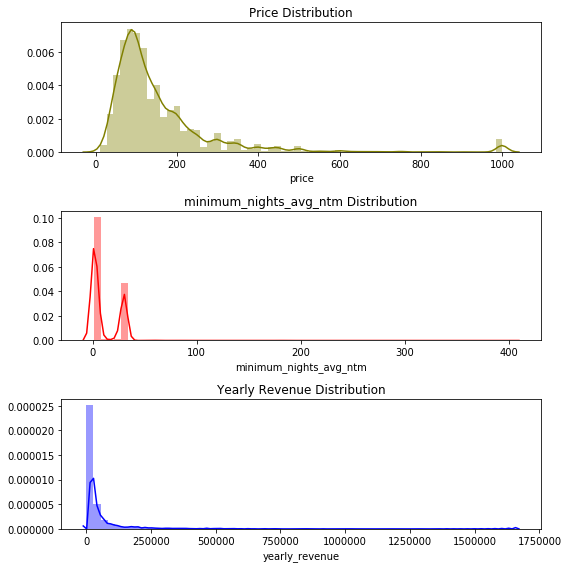

Description Details: 

           price  minimum_nights_avg_ntm  yearly_revenue
count 6583.00000              6583.00000      6583.00000
mean   155.41182                11.62762     42788.59535
std    142.91986                18.25467     92133.01213
min     10.00000                 1.00000        96.00000
25%     79.00000                 2.00000      6460.56000
50%    115.00000                 2.10000     14968.80000
75%    180.00000                30.00000     35164.80000
max   1000.00000               400.00000   1659240.00000


In [103]:
# Days on Airbnb
listings_clean['days_on_airbnb'] = (listings_clean.last_review - listings_clean.first_review ).astype('timedelta64[D]')

# minimum_booking_in_year can be calculated by days_on_airbnb or review per month *12
listings_clean['minimum_booking_in_year'] = listings_clean.reviews_per_month*12

# estimated_booking_in_year
listings_clean['estimated_booking_in_year'] = listings_clean.minimum_booking_in_year/0.5

# nights_per_year_CAP
listings_clean['nights_per_year_CAP'] = listings_clean.estimated_booking_in_year*[30 if x > 30 else x for x in listings_clean['minimum_nights_avg_ntm']]

# occupancy_rate
listings_clean['occupancy_rate'] = listings_clean['nights_per_year_CAP']/365

# replace outrange value
listings_clean.loc[listings_clean.price < 10, 'price']  = 10
listings_clean.loc[listings_clean.price > 1000, 'price']  = 1000

# yearly_revenue
listings_clean['yearly_revenue'] = listings_clean.price * listings_clean.occupancy_rate * 365

# plot
f, axes = plt.subplots(3, 1, figsize=(8, 8), sharex=False)
sns.distplot(listings_clean['price'], kde=True, bins= 60, color="olive", ax=axes[0]).set_title("Price Distribution")
sns.distplot(listings_clean['minimum_nights_avg_ntm'], kde=True, bins= 60, color="red", ax=axes[1]).set_title("minimum_nights_avg_ntm Distribution")
sns.distplot(listings_clean['yearly_revenue'], kde=True, bins= 60, color="blue", ax=axes[2]).set_title("Yearly Revenue Distribution")
plt.tight_layout()
plt.show()


# get the summary
pd.set_option('display.float_format', lambda x: '%.5f' % x)
print('Description Details: \n')
print(listings_clean.loc[:,['price', 'minimum_nights_avg_ntm','yearly_revenue' ]].describe())


In [100]:
## Write the cleaned data for EDA
 
col_to_drop = ['maximum_nights_avg_ntm', 'requires_license', 'host_has_profile_pic', 
               'minimum_booking_in_year', 'estimated_booking_in_year', 
               'nights_per_year_CAP',]    
for feat in listings_clean.columns:
    if feat in col_to_drop:
        listings_clean = drop(listings_clean, feat)

listings_clean.to_csv("listings_clean_eda.csv",index=False)

Dropping host_has_profile_pic...
Dropping maximum_nights_avg_ntm...
Dropping requires_license...
Dropping minimum_booking_in_year...
Dropping estimated_booking_in_year...
Dropping nights_per_year_CAP...


In [101]:
c = pd.DataFrame(listings_clean.info())
c

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6583 entries, 0 to 7513
Data columns (total 80 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   host_id                                       6583 non-null   int64         
 1   host_since                                    6583 non-null   datetime64[ns]
 2   host_response_time                            6583 non-null   object        
 3   host_response_rate                            6583 non-null   category      
 4   host_acceptance_rate                          6583 non-null   float64       
 5   host_is_superhost                             6583 non-null   float64       
 6   host_identity_verified                        6583 non-null   float64       
 7   neighbourhood_group_cleansed                  6583 non-null   category      
 8   zipcode                                       6554 non-null   object

""


# 3. Summary 
<a id = "sum"></a>
>We visualize the distributions for price, reviews, and the resulting yearly_revenue above. 
>The cleaned data set has 6583 observation and 79 features - We keep part of the features for exploratory data analysis and will drop them when modeling. Further, a more detailed report of our cleaned dataset is given below.